In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from pygini import gini

In [2]:
#input_path = Path(r'C:\Users\uriit\OneDrive\Documents\bank_marketing\archive')
path = r"C:\Users\uriit\Downloads\surgeries to predict.csv"
data = pd.read_csv(path, delimiter=',')
data.head()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
0,0,3,1,44,20,853628,178042,149
1,1,0,0,56,27,369199,714022,86
2,2,0,1,45,22,519569,906701,81
3,3,1,0,63,22,230984,454178,177
4,4,1,0,40,35,706850,636647,127


In [3]:
print(f'Shape of dataset is {data.shape}')
data.info()

Shape of dataset is (10000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Unnamed: 0           10000 non-null  int64
 1   Surgery Type         10000 non-null  int64
 2   Anesthesia Type      10000 non-null  int64
 3   Age                  10000 non-null  int64
 4   BMI                  10000 non-null  int64
 5   DoctorID             10000 non-null  int64
 6   AnaesthetistID       10000 non-null  int64
 7   Duration in Minutes  10000 non-null  int64
dtypes: int64(8)
memory usage: 625.1 KB


In [4]:
data.describe()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,1.995300,0.494200,49.585400,24.429700,555664.92060,547050.830900,115.154800
std,2886.89568,1.414383,0.499991,9.979723,5.049258,258429.07277,258173.206729,54.472795
min,0.00000,0.000000,0.000000,13.000000,4.000000,100097.00000,100058.000000,15.000000
25%,2499.75000,1.000000,0.000000,43.000000,21.000000,332224.25000,324239.250000,59.000000
50%,4999.50000,2.000000,0.000000,50.000000,24.000000,559765.00000,544535.000000,131.000000
75%,7499.25000,3.000000,1.000000,56.000000,28.000000,776335.50000,767940.250000,161.000000
max,9999.00000,4.000000,1.000000,88.000000,43.000000,999995.00000,999907.000000,242.000000


In [5]:
doctor = data['DoctorID'].value_counts()  
len(doctor[doctor >1]),len(data)

(54, 10000)

In [6]:
data['Anesthesia Type'].value_counts()  

0    5058
1    4942
Name: Anesthesia Type, dtype: int64

In [7]:
data['Anesthesia Type'].value_counts()  

0    5058
1    4942
Name: Anesthesia Type, dtype: int64

In [8]:
data['AnaesthetistID'].value_counts()  

106799    3
496332    2
831287    2
685091    2
349847    2
         ..
496559    1
516604    1
292751    1
162063    1
248809    1
Name: AnaesthetistID, Length: 9943, dtype: int64

In [9]:
np.quantile(data.groupby('DoctorID').max()['Duration in Minutes'] - data.groupby('DoctorID').min()['Duration in Minutes'],.999)

116.0

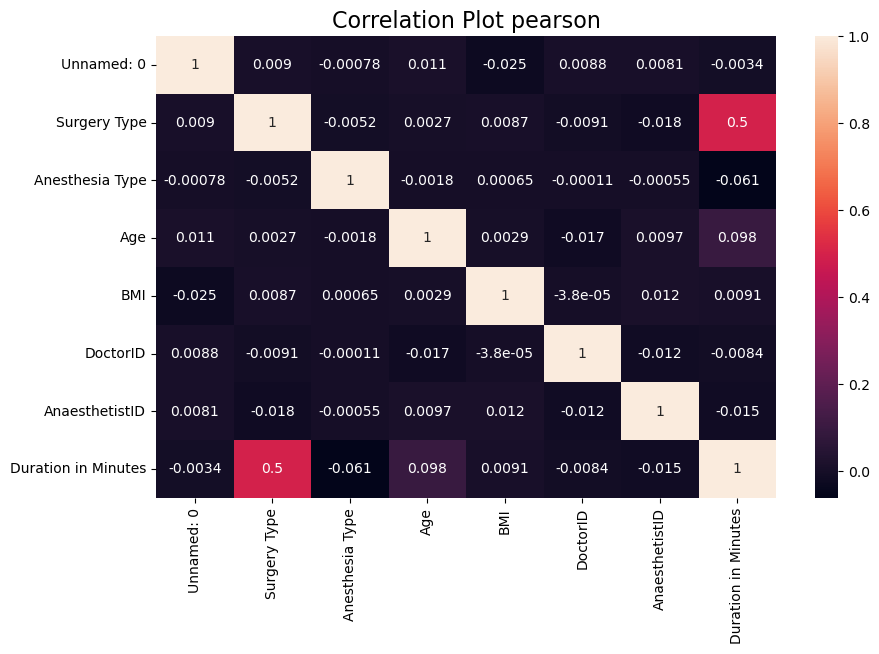

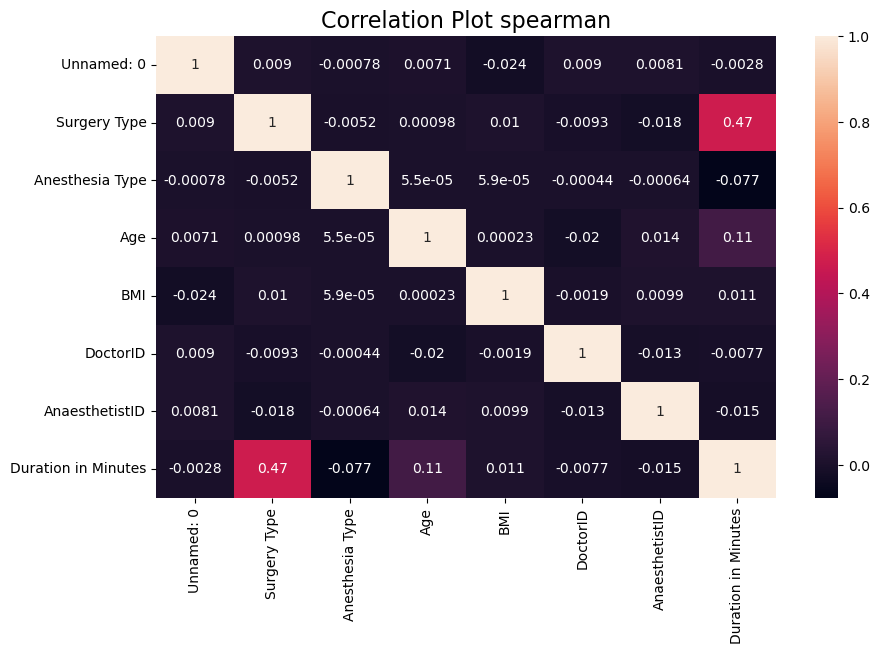

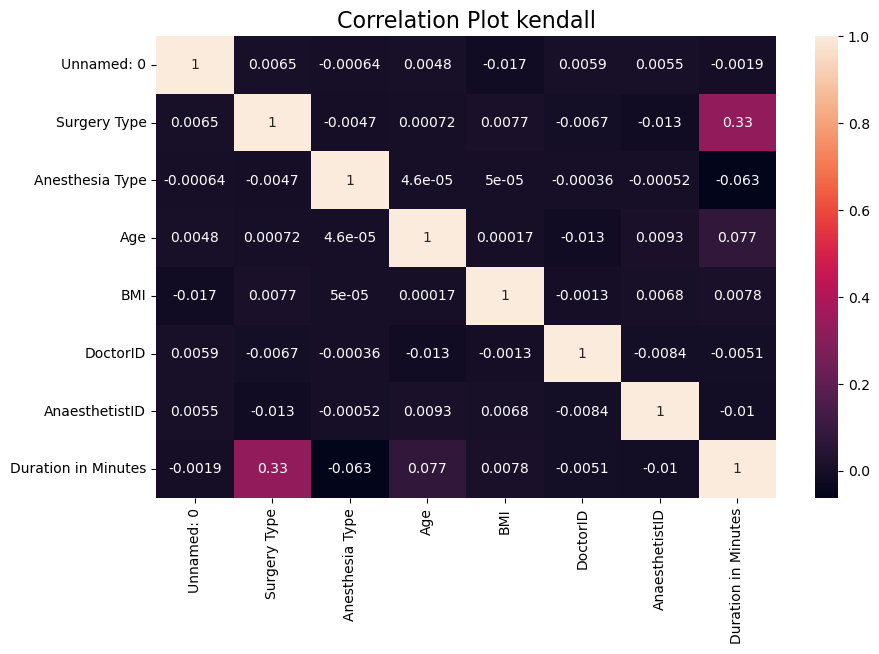

In [10]:
for corr_type in ['pearson','spearman','kendall']:
    corr = data.corr(method=corr_type)
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True)
    plt.title('Correlation Plot '+ corr_type, size=16)
    plt.show()

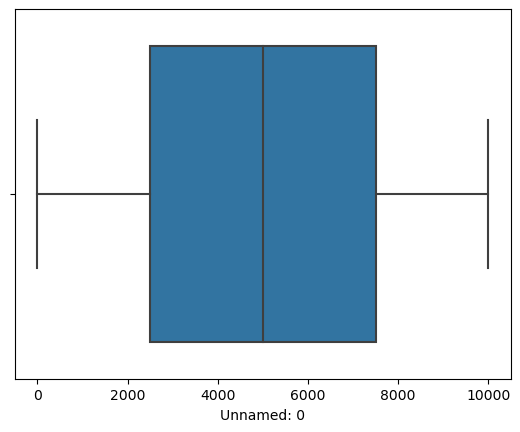

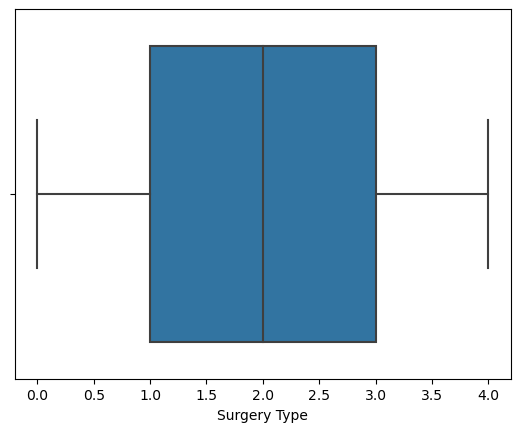

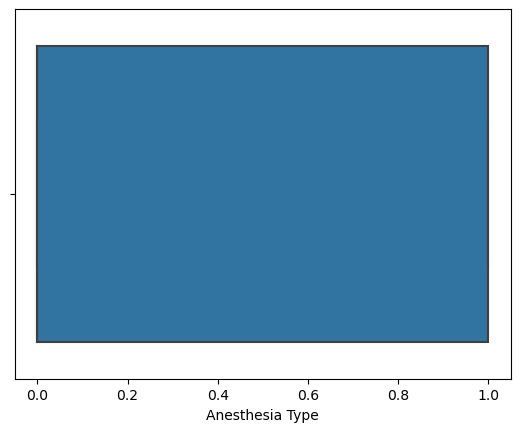

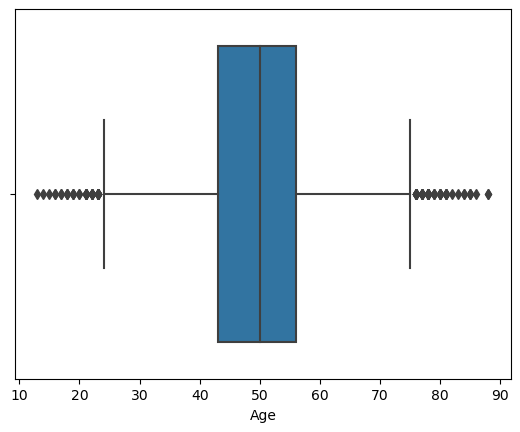

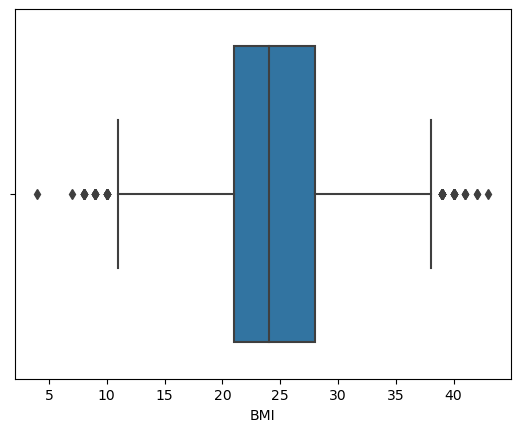

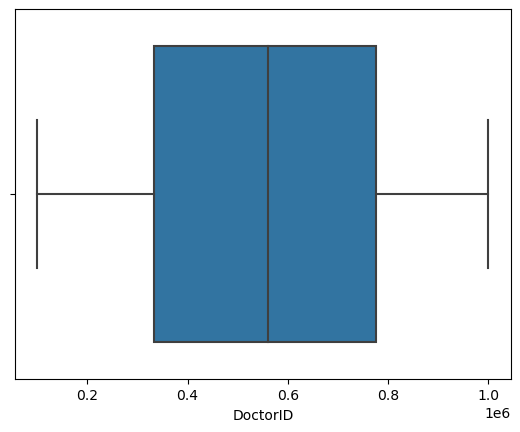

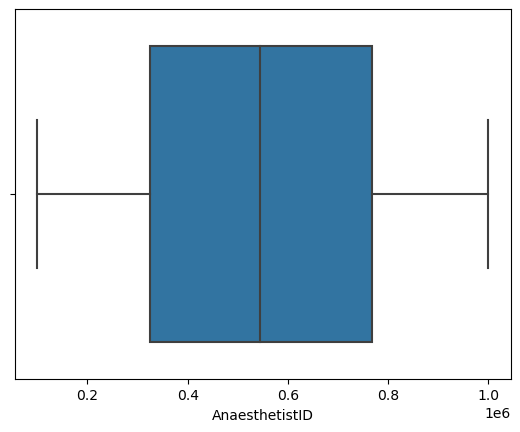

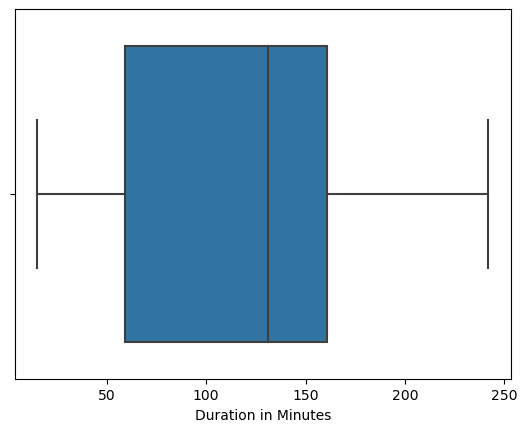

In [11]:
for col in data.columns:
    sns.boxplot(x=data[col])
    plt.show()

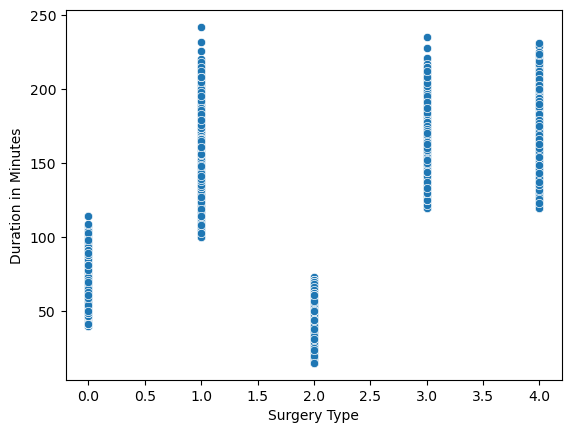

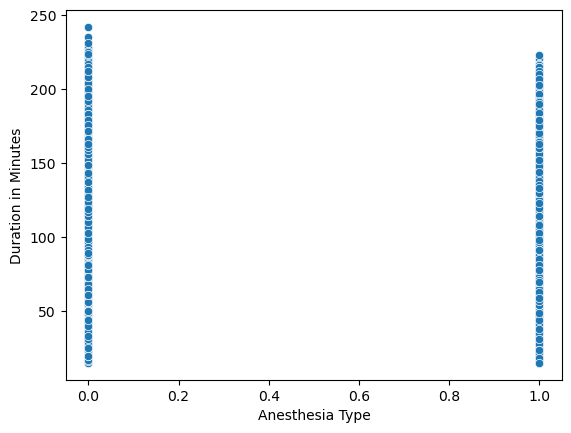

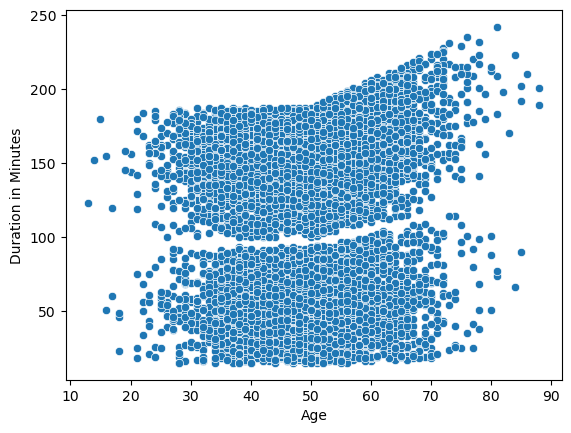

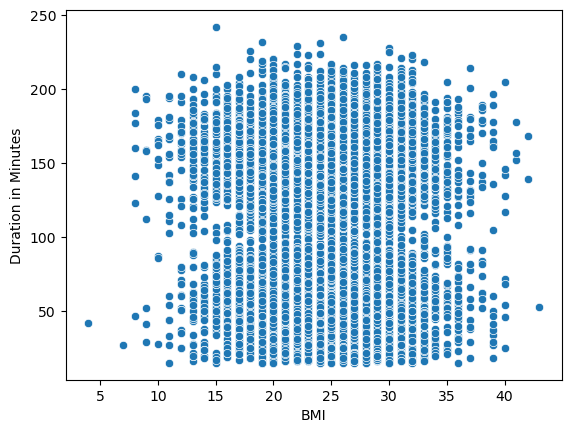

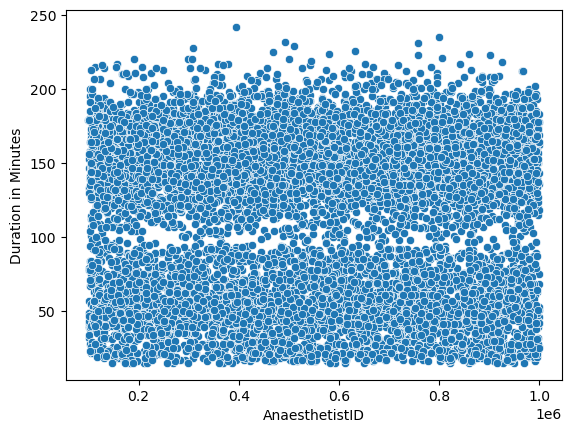

In [12]:
cols = [c for c in data.columns if c not in ['Duration in Minutes','Unnamed: 0','DoctorID'] ]
for col in cols:
    sns.scatterplot(data=data, x=col, y='Duration in Minutes')
    plt.show()

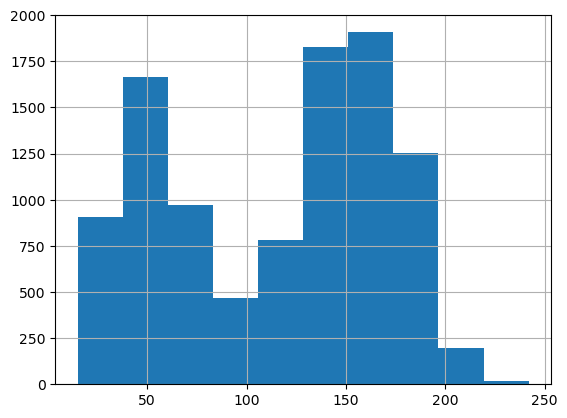

In [13]:
data['Duration in Minutes'].hist()
plt.show()

In [14]:
data['Surgery Type'].unique()
color_dict = {3:'green', 0: 'red', 1: 'blue',2:'yellow',4:'black'}

In [15]:
data['Surgery Type'].value_counts(normalize= True)

1    0.2041
3    0.2010
0    0.1998
4    0.1990
2    0.1961
Name: Surgery Type, dtype: float64

In [16]:
data[data['Duration in Minutes'] < 120 ]['Surgery Type'].value_counts(normalize= True)

0    0.464219
2    0.455623
1    0.080158
Name: Surgery Type, dtype: float64

In [17]:
data[data['Duration in Minutes'] > 120 ]['Surgery Type'].value_counts(normalize= True)

3    0.354262
4    0.349664
1    0.296074
Name: Surgery Type, dtype: float64

In [ ]:
#differet type of surgeries take different time

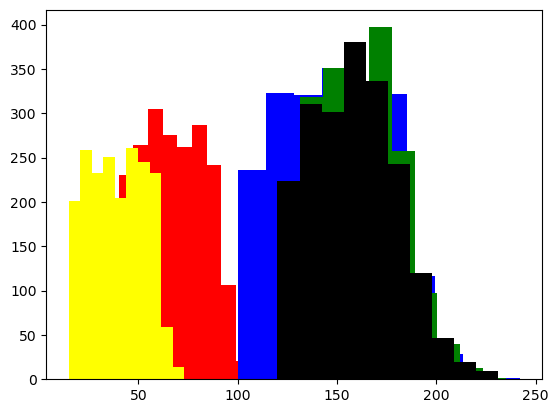

In [18]:
for opname, opdata in data.groupby('Surgery Type'):
    
    plt.hist(opdata['Duration in Minutes'],color = color_dict[opname])
    

In [19]:
np.quantile(data['Duration in Minutes'],0.9)

179.0

In [20]:
up = 2* np.quantile(data['Duration in Minutes'],0.75) - 2* np.quantile(data['Duration in Minutes'],0.25)

In [21]:
uplayer = data[data['Duration in Minutes'] > up]

In [22]:
data.describe()

,Unnamed: 0,Surgery Type,Anesthesia Type,Age,BMI,DoctorID,AnaesthetistID,Duration in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,1.995300,0.494200,49.585400,24.429700,555664.92060,547050.830900,115.154800
std,2886.89568,1.414383,0.499991,9.979723,5.049258,258429.07277,258173.206729,54.472795
min,0.00000,0.000000,0.000000,13.000000,4.000000,100097.00000,100058.000000,15.000000
25%,2499.75000,1.000000,0.000000,43.000000,21.000000,332224.25000,324239.250000,59.000000
50%,4999.50000,2.000000,0.000000,50.000000,24.000000,559765.00000,544535.000000,131.000000
75%,7499.25000,3.000000,1.000000,56.000000,28.000000,776335.50000,767940.250000,161.000000
max,9999.00000,4.000000,1.000000,88.000000,43.000000,999995.00000,999907.000000,242.000000


In [23]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,max_error, mean_absolute_error

In [24]:
X = data.drop(["Duration in Minutes",'Unnamed: 0','DoctorID','AnaesthetistID'], axis=1)
y = data["Duration in Minutes"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
X

,Surgery Type,Anesthesia Type,Age,BMI
0,3,1,44,20
1,0,0,56,27
2,0,1,45,22
3,1,0,63,22
4,1,0,40,35
...,...,...,...,...
9995,4,0,62,23
9996,0,0,46,32
9997,0,0,23,29
9998,3,1,36,29


In [26]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [27]:
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse"  # Evaluation metric (Root Mean Squared Error)
    # Add more parameters as needed
}

In [28]:
# Train the model
num_boost_round = 100  # Number of boosting iterations
model = xgb.train(params, dtrain, num_boost_round)

In [29]:
y_pred = model.predict(dtest)

In [30]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MEA:",mae)
print(np.sum(np.abs(y_test-  y_pred)> y_test/3)/ len(y_test))
print(np.sum((  y_pred - y_test)> y_test/3)/ len(y_test))

RMSE: 19.635921930516425
MEA: 16.151018454551696
0.1235
0.107


In [ ]:
# we add metric of how much of the surgeries were off by use preportion
# we did this both absuoutly and with orientation

In [31]:
np.std( y_pred)

51.302017

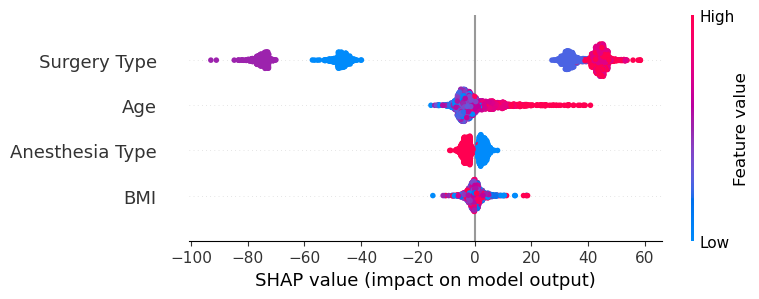

In [32]:
import shap

# Create an explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values, X_test)

In [ ]:
# we found that Surgey type as expected is the most important feature
# next we used outlier trasholding 
#we divided the data by the surgery types
#both methods did not change the score significatlley  

In [33]:
from scipy.stats import trim_mean
trim_percentage = 0.05


# Split the data into features (X) and target variable (y)
X = data.drop(["Duration in Minutes",'Unnamed: 0','DoctorID','AnaesthetistID'], axis=1)

y = data["Duration in Minutes"]
X

,Surgery Type,Anesthesia Type,Age,BMI
0,3,1,44,20
1,0,0,56,27
2,0,1,45,22
3,1,0,63,22
4,1,0,40,35
...,...,...,...,...
9995,4,0,62,23
9996,0,0,46,32
9997,0,0,23,29
9998,3,1,36,29


In [34]:


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
trimmed_mean = trim_mean(y_train, trim_percentage)
trimmed_std = y_train.std()
lower_bound =  trimmed_mean - 2 * trimmed_std
upper_bound = trimmed_mean + 2 * trimmed_std
upper_bound = 2* np.quantile(y_train,0.75) -  np.quantile(y_train,0.25)
y_train =y_train.clip(lower_bound, upper_bound)
# Create DMatrix for training and testing sets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the model parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse"  # Evaluation metric (Root Mean Squared Error)
    # Add more parameters as needed
}

# Train the model
num_boost_round = 100  # Number of boosting iterations
model = xgb.train(params, dtrain, num_boost_round)

# Make predictions
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MEA:",mae)
print(np.sum(np.abs(y_test-  y_pred)> y_test/3)/ len(y_test))
print(np.sum((  y_pred - y_test)> y_test/3)/ len(y_test))

RMSE: 19.635921930516425
MEA: 16.151018454551696
0.1235
0.107


In [35]:

max_error(y_test , y_pred)

65.228759765625

(array([  1.,  24., 140., 323., 408., 447., 383., 208.,  51.,  15.]),
 array([-65.22875977, -52.8326416 , -40.43652344, -28.04040527,
        -15.64428711,  -3.24816895,   9.14794922,  21.54406738,
         33.94018555,  46.33630371,  58.73242188]),
 <BarContainer object of 10 artists>)

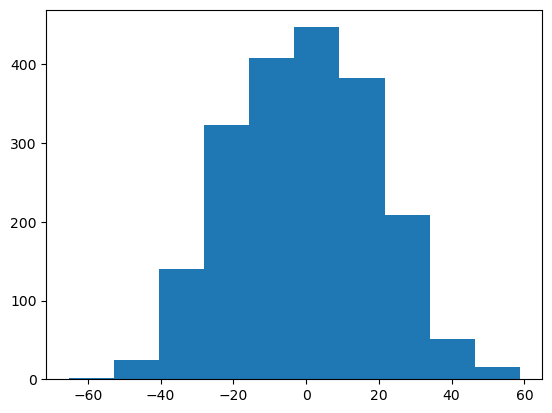

In [36]:
plt.hist(y_test - y_pred)

In [37]:
len(data.loc[y_test[np.abs(y_test - y_pred) > 30].index]) /len(y_test)

0.121

In [38]:
data.loc[y_test[np.abs(y_test - y_pred) > 50].index]['Duration in Minutes'].mean()

172.66666666666666

In [39]:
data.loc[y_test[np.abs(y_test - y_pred) > 30].index]['Surgery Type'].value_counts(normalize=True)  

1    0.504132
3    0.202479
4    0.177686
0    0.078512
2    0.037190
Name: Surgery Type, dtype: float64

In [40]:
 X_test['Surgery Type'].value_counts(normalize=True)  

1    0.2130
3    0.2100
4    0.2005
0    0.1920
2    0.1845
Name: Surgery Type, dtype: float64

In [41]:
X_train['Surgery Type'].value_counts(normalize=True)  

1    0.201875
0    0.201750
2    0.199000
3    0.198750
4    0.198625
Name: Surgery Type, dtype: float64

In [42]:
index1 = X_test[X_test['Surgery Type'] == 1].index
dtest1 = xgb.DMatrix(X_test.loc[index1], label=y_test.loc[index1])
y_pred1 = model.predict(dtest1)

In [43]:
mean_absolute_error(y_test.loc[index1], y_pred1)

21.139538294832473

(array([ 1., 16., 56., 46., 63., 81., 59., 60., 32., 12.]),
 array([-65.22875977, -52.94695892, -40.66515808, -28.38335724,
        -16.1015564 ,  -3.81975555,   8.46204529,  20.74384613,
         33.02564697,  45.30744781,  57.58924866]),
 <BarContainer object of 10 artists>)

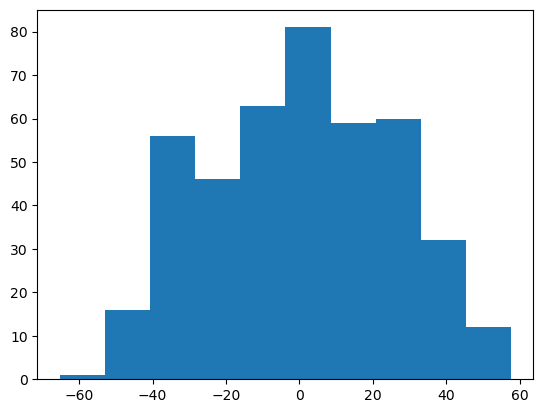

In [44]:
plt.hist(y_test.loc[index1]- y_pred1)

In [45]:
X = data.drop(["Duration in Minutes",'Unnamed: 0','DoctorID','AnaesthetistID'], axis=1)
X1 = X[X['Surgery Type'].isin([0,2])]
y1 = y.loc[X1.index]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
trimmed_mean = trim_mean(y_train, trim_percentage)
trimmed_std = y_train.std()
lower_bound =  trimmed_mean - 2 * trimmed_std
upper_bound = trimmed_mean + 2 * trimmed_std
upper_bound = 2* np.quantile(y_train,0.75) -  np.quantile(y_train,0.25)
y_train =y_train.clip(lower_bound, upper_bound)
# Create DMatrix for training and testing sets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the model parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse"  # Evaluation metric (Root Mean Squared Error)
    # Add more parameters as needed
}

# Train the model
num_boost_round = 100  # Number of boosting iterations
model = xgb.train(params, dtrain, num_boost_round)

# Make predictions
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MEA:",mae)
print("max error:",max_error(y_test, y_pred))
print(np.sum(np.abs(y_test-  y_pred)> y_test/3)/ len(y_test))
print(np.sum((  y_pred - y_test)>y_test.apply(lambda xx: np.max([xx, 30]))/4)/ len(y_test))


RMSE: 16.36755370925087
MEA: 13.889204535821472
max error: 42.80611038208008
0.32954545454545453
0.2904040404040404


In [46]:
y_test.apply(lambda xx: np.max([xx, 30]))

397     49
2651    76
6742    30
1832    64
855     68
        ..
3124    30
1905    83
8341    42
2410    43
9552    85
Name: Duration in Minutes, Length: 792, dtype: int32

In [47]:
X = data.drop(["Duration in Minutes",'Unnamed: 0','DoctorID','AnaesthetistID'], axis=1)
X1 = X[~X['Surgery Type'].isin([0,2])]
y1 = y.loc[X1.index]
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
trimmed_mean = trim_mean(y_train, trim_percentage)
trimmed_std = y_train.std()
lower_bound =  trimmed_mean - 2 * trimmed_std
upper_bound = trimmed_mean + 2 * trimmed_std
upper_bound = 2* np.quantile(y_train,0.75) -  np.quantile(y_train,0.25)
y_train =y_train.clip(lower_bound, upper_bound)
# Create DMatrix for training and testing sets
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set the model parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse"  # Evaluation metric (Root Mean Squared Error)
    # Add more parameters as needed
}

# Train the model
num_boost_round = 100  # Number of boosting iterations
model = xgb.train(params, dtrain, num_boost_round)

# Make predictions
y_pred = model.predict(dtest)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)

print("RMSE:", rmse)
print("MEA:",mae)
print("max error:",max_error(y_test, y_pred))
print(np.sum(np.abs(y_test-  y_pred)> y_test/3)/ len(y_test))
print(np.sum((  y_pred - y_test)>y_test.apply(lambda xx: np.max([xx, 40]))/4)/ len(y_test))

RMSE: 22.561074405716706
MEA: 18.86006603130533
max error: 88.7015380859375
0.034739454094292806
0.076095947063689


In [48]:
index10 = X_test[X_test['Surgery Type'] != 1].index
dtest10  = xgb.DMatrix(X_test.loc[index10], label=y_test.loc[index10])
y_pred10 = model.predict(dtest10 )
mean_absolute_error(y_test.loc[index10], y_pred10)

16.504843296148838

(array([ 13.,  61., 114., 114., 137., 133., 122.,  72.,  12.,   2.]),
 array([-47.08111572, -36.75809021, -26.4350647 , -16.11203918,
         -5.78901367,   4.53401184,  14.85703735,  25.18006287,
         35.50308838,  45.82611389,  56.1491394 ]),
 <BarContainer object of 10 artists>)

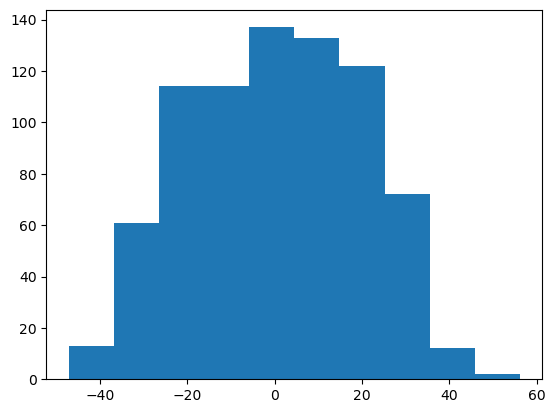

In [49]:
plt.hist(y_test.loc[index10]- y_pred10)

In [50]:
(y_test.loc[index10]- y_pred10).mean()  

0.4148354163536659

In [53]:
(np.abs(y_test - y_pred)/y_test).mean()

0.12537340171827233

In [54]:
y_test.mean()

155.36476426799007

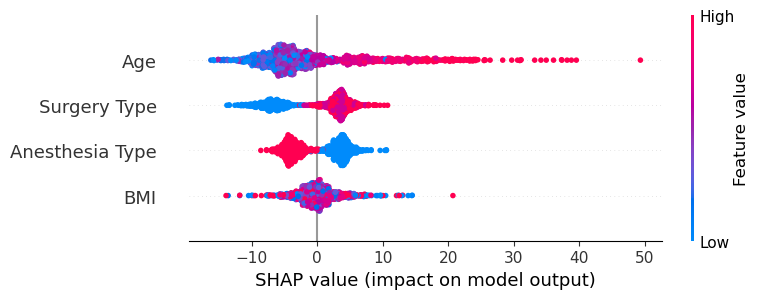

In [55]:
import shap

# Create an explainer object
explainer = shap.Explainer(model)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summarize the SHAP values
shap.summary_plot(shap_values, X_test)

In [56]:
shap_values, X_test

(array([[  2.9744902 ,  -4.50513   ,  -6.050833  ,  -1.3635354 ],
        [ -8.509835  ,   3.7403464 ,  -2.4978251 ,  -1.2470541 ],
        [  5.77727   ,   3.0570269 ,  15.145889  ,   7.364427  ],
        ...,
        [ -7.0746193 ,   3.9671888 ,  -5.122806  ,   0.53198314],
        [ -1.1783001 ,  -3.4236648 ,  20.212221  , -11.8453245 ],
        [  3.684523  ,   6.0938697 ,  -6.1145906 ,   1.2508923 ]],
       dtype=float32),
       Surgery Type  Anesthesia Type  Age  BMI
 5118             3                1   51   23
 3007             1                0   54   23
 8113             4                0   60   22
 5677             4                0   54   20
 6559             4                1   50   21
 ...            ...              ...  ...  ...
 4013             3                1   51   30
 6896             4                1   45   19
 4798             1                0   51   24
 1985             4                1   68   34
 3430             4                0   51   14
 
 